*Prepared for the course "TDPS22: Data Science Programming" at Jönköping University, Teacher: [Marcel Bollmann](mailto:marcel.bollmann@ju.se)*

# Exercise 3: Making High-Quality Seaborn Visualizations

This notebook contains more exercises on data visualization using the Seaborn library. In particular, we'll focus on making _high-quality plots_ that involve tweaking and customizing certain aspects of the plot styling. We'll also revisit some basic functionality of the Seaborn library.

We're starting with the modified Coffee Chain dataset that Exercise 2 ended with, and then will produce other plots using the [Yu-Gi-Oh Normal Monster Cards](https://www.kaggle.com/datasets/rushikeshhiray/yugioh-normal-monster-cards) dataset.

### Learning Goals

- Know how to _customize the styling & layout_ of plots generated with the Seaborn API.

### Useful Resources

+ ["Customizing Matplotlib: Configurations and Stylesheets"](https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html) in the Python Data Science Handbook
+ ["Plotting with Pandas and Seaborn" in Python for Data Analysis](https://wesmckinney.com/book/plotting-and-visualization.html#vis_pandas)
+ [Seaborn User Guide & Tutorial](https://seaborn.pydata.org/tutorial.html)


In [1]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

- - - 
## Controlling figure aesthetics (on a line plot)

Here is the dataset that Exercise 2 ended with, a reshaped version of the Coffee Chain dataset.  We'll start from Seaborn's own tutorial on [controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) to make some modifications to it.

In [3]:
df_coffee = pd.read_csv("data/coffee-chain-reshaped.csv")
df_coffee["Ddate"] = df_coffee["Ddate"].transform(pd.to_datetime)

In [4]:
# I defined this function so that any keyword arguments you give it will be passed on to sns.lineplot()

def plot_coffee(**kwargs):
    g = sns.lineplot(data=df_coffee.set_index("Ddate"), **kwargs)
    g.figure.autofmt_xdate()
    return g

<Figure size 432x288 with 1 Axes>

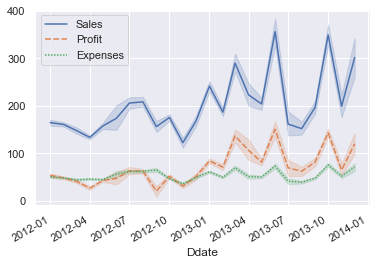

In [5]:
plot_coffee();

**1. Change the plot style so that it has a white background with ticks on the axes, and no _spines (borders)_ on the top and right-hand side.** Basically, follow the Seaborn tutorial on [controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) and find the parts that achieve this.

<Figure size 432x288 with 1 Axes>

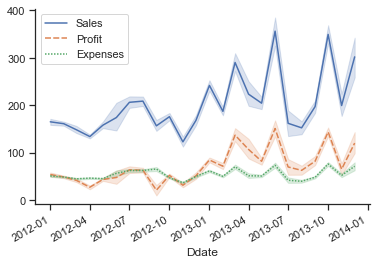

In [6]:
# Your code here
def plot_coffee(**kwargs):
    sns.set_style("white")
    sns.set_style("ticks")
    g = sns.lineplot(data=df_coffee.set_index("Ddate"), **kwargs)
    g.figure.autofmt_xdate()
    sns.despine()
    return g

plot_coffee();

**2. Change the plot so that it is larger, and also has larger fonts and thicker lines.** Make sure that the legend doesn't cover up the lines of the plot, though.

<Figure size 1080x576 with 1 Axes>

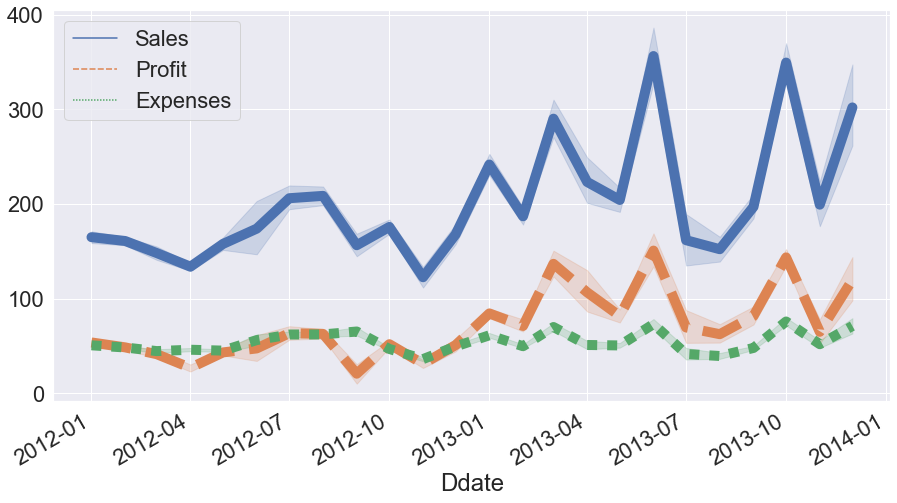

In [7]:
# Your code here
def plot_coffee(**kwargs):
    sns.set(rc = {"figure.figsize": (15, 8)})
    sns.set(font_scale = 2)
    g = sns.lineplot(data=df_coffee.set_index("Ddate"), **kwargs, linewidth = 10)
    g.figure.autofmt_xdate()
    return g

plot_coffee();

**3. Change the *y*-axis so that it has "major" ticks every 50 steps, and "minor" ticks every 10 steps.** Here, you need to use standard Matplotlib functions; Seaborn doesn't provide its own interface for that.

_Note:_ There are several different ways to do that with Matplotlib, which may be a little confusing. You can choose to either:
- Use the `plt.MultipleLocator` approach described in the [_Python Data Science Handbook_](https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html#Fancy-Tick-Formats).
- Use the `set_yticks()` approach described in ["Ticks, Labels, and Legends" from _Python for Data Analysis_](https://wesmckinney.com/book/plotting-and-visualization.html#vis_matplotlib_annotation).

It's good to know both, but you can use whatever you feel more comfortable with.

<Figure size 1080x576 with 1 Axes>

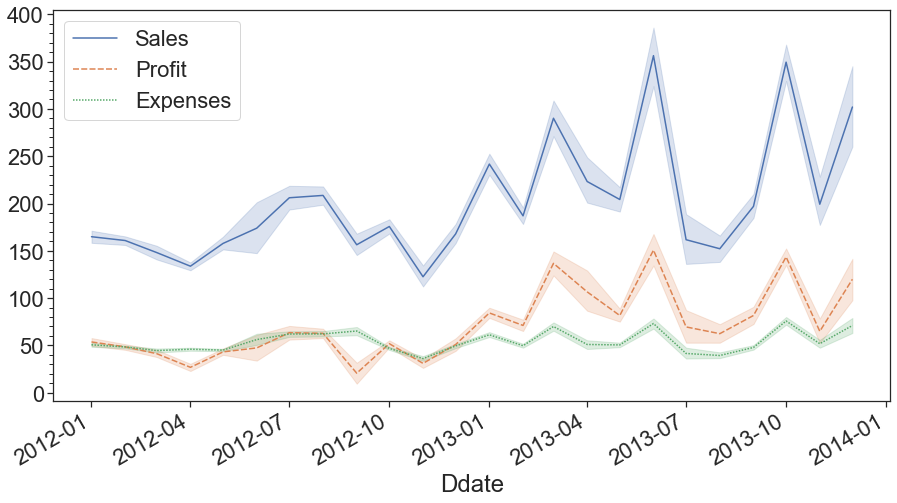

In [8]:
# Your code here
import matplotlib.ticker as ticker
def plot_coffee(**kwargs):
    sns.set_style("white")
    sns.set_style("ticks")
    g = sns.lineplot(data=df_coffee.set_index("Ddate"), **kwargs)
    g.figure.autofmt_xdate()
    g.set_yticks(np.arange(0, 401, 50), minor = False)
    g.set_yticks(np.arange(0, 401, 10), minor = True)
    return g

plot_coffee();

_Note:_ Customizing the date ticks is a little bit trickier; we're not going into that here, but the Matplotlib documentation [has got you covered](https://matplotlib.org/3.5.1/gallery/text_labels_and_annotations/date.html) if you ever need to do that.

**4. Turn off the "error band" plotting.** Seaborn gives us a lot of functionality out of the box; with this line plot, it automatically estimates confidence intervals and plots corresponding error bands around the lines. But maybe we don't want that; can you find how to turn this off in the [documentation of `sns.lineplot()`](https://seaborn.pydata.org/generated/seaborn.lineplot.html)?

<Figure size 1080x576 with 1 Axes>

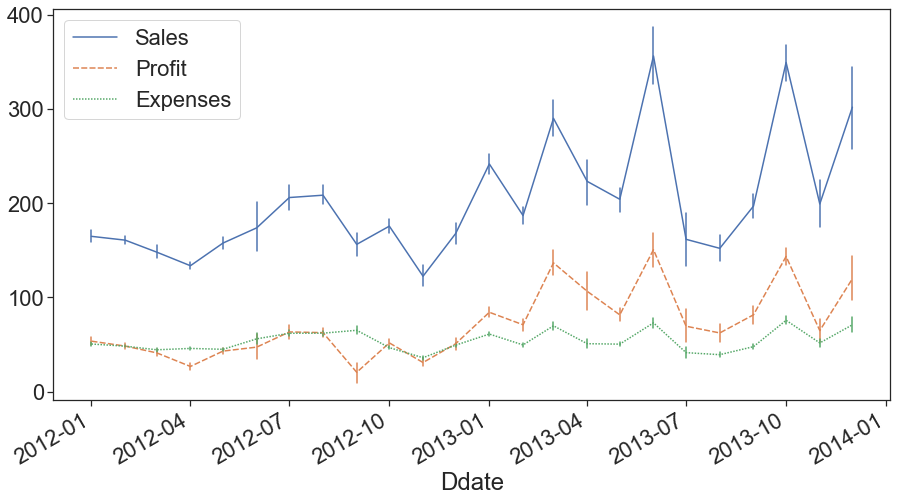

In [9]:
# Your code here
def plot_coffee(**kwargs):
    g = sns.lineplot(data=df_coffee.set_index("Ddate"), **kwargs, err_style = "bars")
    g.figure.autofmt_xdate()
    return g

plot_coffee();

**5. Plot _markers_ for each data point and make all lines solid.** By default, Seaborn gives each line a different style (e.g., solid, dashed, dotted). This is good! Not relying on color alone to convey information is good practice for accessibility, as it may be hard to distinguish the colors in some situations (e.g., for colorblind people, or when printing on a black-and-white printer).

However, maybe we want to show _markers_ on the individual data points instead of different line styles, for example because we find that easier to read for a given plot. Seaborn easily lets you customize that directly on the [`sns.lineplot()` function](https://seaborn.pydata.org/generated/seaborn.lineplot.html).

<Figure size 1080x576 with 1 Axes>

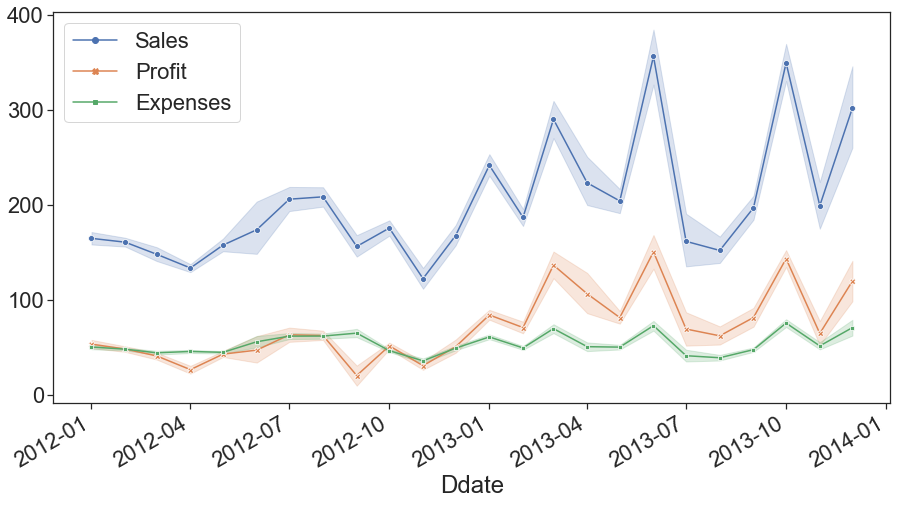

In [10]:
# Your code here
def plot_coffee(**kwargs):
    g = sns.lineplot(data=df_coffee.set_index("Ddate"), **kwargs, markers = True, dashes = False)
    g.figure.autofmt_xdate()
    return g

plot_coffee();

- - - 
## Controlling figure aesthetics (on categorical plots & facet grids)

Let's turn to the Yu-Gi-Oh dataset now. I already cleaned this dataset up a little so we can focus on the visualization aspects in this exercise. Don't worry, you don't need to know anything about the Yu-Gi-Oh card game — I don't know much about it either :)

In [11]:
df = pd.read_csv("data/yu-gi-oh.csv")
df

,Name,Attributes,Sub-Types,Level,Attack_Points,Defense_Points
0,7 Colored Fish,Water,Fish,4,1800,800
1,Acrobat Monkey,Earth,Machine,3,1000,1800
2,Aitsu,Fire,Fairy,5,100,100
3,Alexandrite Dragon,Light,Dragon,4,2000,100
4,Alien Shocktrooper,Earth,Reptile,4,1900,800
...,...,...,...,...,...,...
469,Yamadron,Fire,Dragon,5,1600,1800
470,Yaranzo,Dark,Zombie,4,1300,1500
471,Zoa,Dark,Fiend,7,2600,1900
472,Zombino,Earth,Zombie,4,2000,0


**6. Recreate the following scatter plot that shows the relation between _attack points_ and _defense points_ by _level_ of the monster card:**

<div style="padding-top:2em">
<img src="03_yugioh_scatterplot.png" width="400"/>
</div>


Concretely, you need to:

- **Make a scatter plot** of _attack points_ and _defense points_ that shows the _levels_ in different colors. I used `flare` as the color palette here, but feel free to try others!
- **Set the _x_-axis and _y_-axis to have minor ticks every 100 points.** This should work the same way as in Q3.
- **Change the _axis labels_ to read "Attack" and "Defense"** instead of their default values.
- **Make the legend show _all 8 levels_** and **move it outside the plot to the right.** _(Hint: If you look at [Seaborn's API documentation](https://seaborn.pydata.org/api.html), you can find a function `move_legend` that you can use for this purpose.)_

<matplotlib.legend.Legend object at 0x7f81e934f490>

<Figure size 576x432 with 1 Axes>

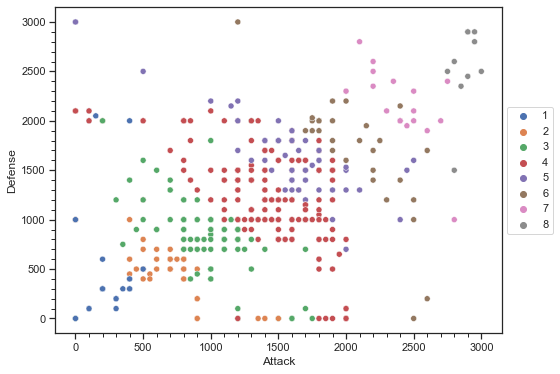

In [12]:
# Your code here
sns.set(rc = {"figure.figsize": (8, 6)})
sns.set_style("ticks")
g = sns.scatterplot(data = df, x = "Attack_Points", y = "Defense_Points", hue = "Level", palette = "deep")
g.set_xticks(np.arange(0, 3001, 100), minor = True)
g.set_yticks(np.arange(0, 3001, 100), minor = True)
plt.xlabel("Attack")
plt.ylabel("Defense")
g.legend(loc = "center left", bbox_to_anchor=(1, 0.5))

**7. Turn the scatter plot above into a _FacetGrid_ of six scatter plots that distinguish by _Attributes_.**

That means you should:

- **Find the _figure-level function_ that corresponds to `scatterplot()`** from the [Seaborn API documentation](https://seaborn.pydata.org/api.html).
- **Make the same scatter plot as above, but additionally distinguish `Attributes` in columns.** You might want to choose to wrap columns as well for better readability.
- **Modify the axis titles as before,** and **change the column titles to read "Water monsters", "Earth monsters", etc.** — this will need different functions as before, since we know have a _FacetGrid_ of several plots.

Feel free to experiment with different parameters to get a result you think looks good.  Your final result could look something like this:

<div style="padding-top:2em">
<img src="03_yugioh_facetgrid.png" width="500"/>
</div>

<Figure size 1125.72x720 with 6 Axes>

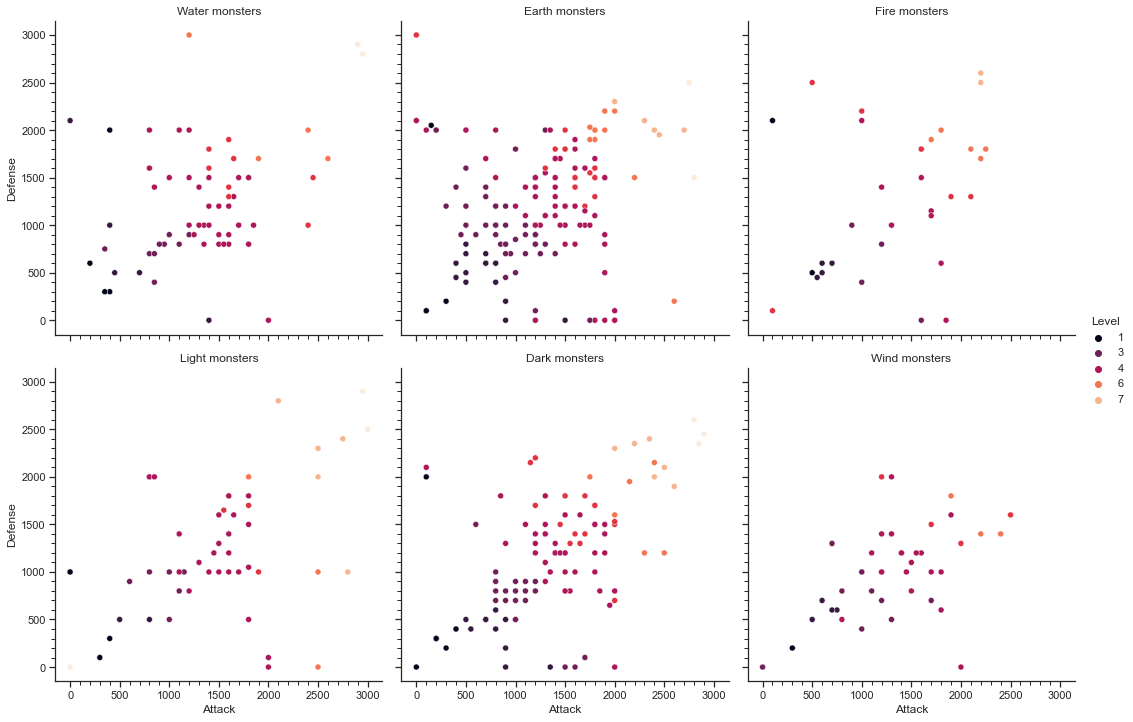

In [29]:
# Your code here
g = sns.relplot(data = df, x = "Attack_Points", y = "Defense_Points", col = "Attributes",
            col_wrap = 3, hue = "Level", palette = "rocket")

axes = g.axes.flatten()
axes[0].set_title("Water monsters")
axes[1].set_title("Earth monsters")
axes[2].set_title("Fire monsters")
axes[3].set_title("Light monsters")
axes[4].set_title("Dark monsters")
axes[5].set_title("Wind monsters")

for ax in axes:
    ax.set_xlabel("Attack")
    ax.set_ylabel("Defense")
    ax.set_xticks(np.arange(0, 3001, 100), minor = True)
    ax.set_yticks(np.arange(0, 3001, 100), minor = True)

**8. Pick individual colors for different monster _Attributes_.** Below is a simple strip plot showing the distribution of _Attack Points_ by the different monster _Attributes_ in the dataset. Maybe we'd like to match the colors to their attributes, e.g., give "Fire" a red color, "Light" a yellow one, etc.

Modify the code so that you define individual colors for each _Attribute_ value. (You can pick whatever colors you think look best, but one suggestion is to simply take Seaborn's default color palette, and pick individual colors from there.)

<Figure size 432x288 with 1 Axes>

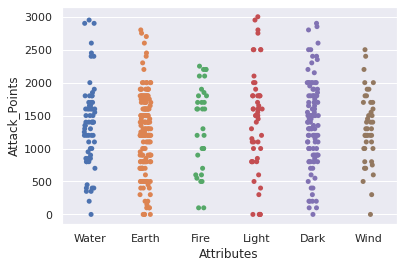

In [14]:
sns.stripplot(data=df, x="Attributes", y="Attack_Points");

<AxesSubplot:xlabel='Attributes', ylabel='Attack_Points'>

<Figure size 576x432 with 1 Axes>

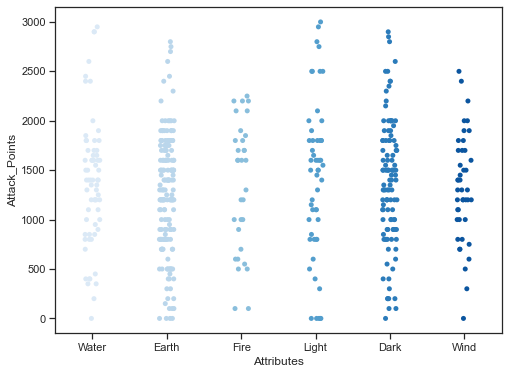

In [27]:
# Your code here
sns.stripplot(data=df, x="Attributes", y="Attack_Points", palette=['#dbe9f6', '#bad6eb', '#89bedc', '#539ecd', '#2b7bba', '#0b559f'])